# Lab 2: Wine Quality Classification

**Done By:**
- Name: Sudip Parajuli
- Roll: PUR077BEI041
- Faculty: BEI

**Submitted To:**
- Name: Pukar Karki
- Department of Electronics and Computer Engineering 
- IOE Purwanchal Campus, Dharan

In [253]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np

In [254]:
df_red = pd.read_csv('wine_quality/winequality-red.csv', sep=';')

In [255]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [256]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Plotting the heatmap of correleation to see the correlation between the different variables

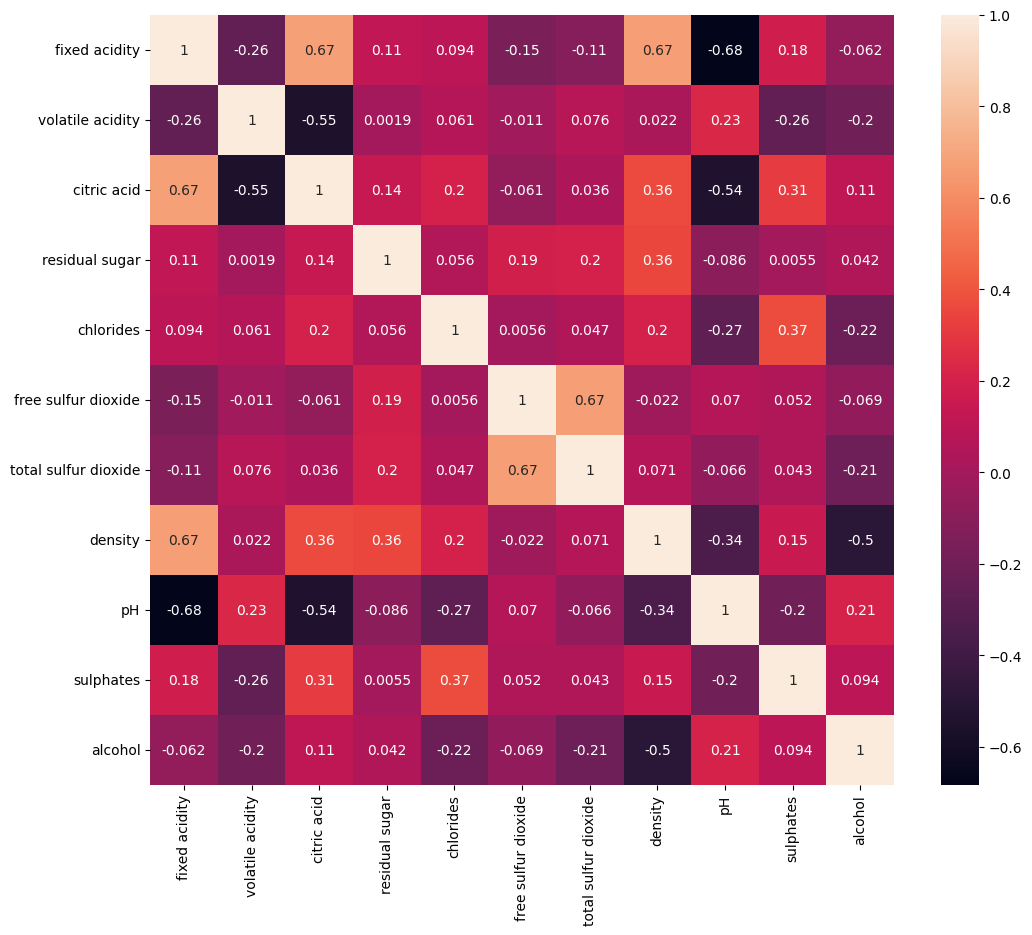

In [257]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_red.iloc[:, :-1].corr(), annot=True)
plt.show()

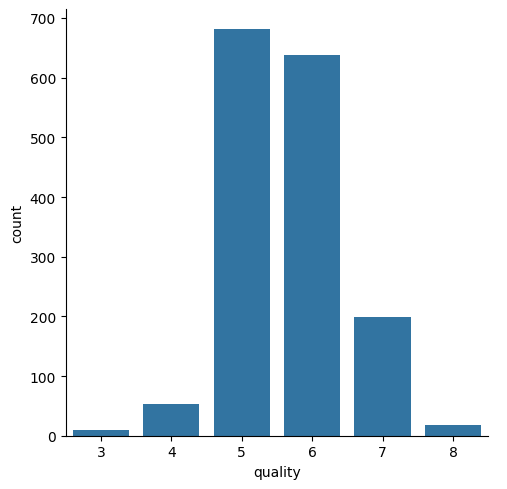

In [258]:
#testing the uniqueness in the values of quality
df_red["quality"].unique()
sns.catplot(x='quality', data=df_red, kind='count')

In [259]:
df_red["quality"] = df_red["quality"].apply(lambda x: 1 if x >= 7 else 0)
df_red["quality"].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [260]:
#some metrics
model_names = []
model_scores = []
labels = ["bad", "good"]

In [261]:
X = df_red.drop('quality', axis=1)
y = df_red['quality']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


In [262]:
scaler = StandardScaler()

# Fit and transform the training data
X_train= scaler.fit_transform(X_train)

# Transform the test data
X_test = scaler.transform(X_test)

# KNN

In [263]:
from sklearn.neighbors import KNeighborsClassifier

In [264]:
X_train

array([[ 1.07100074, -0.59949467,  1.53130838, ..., -1.77013426,
        -0.17977295, -0.78194777],
       [-0.1970216 , -1.94966075,  0.49744889, ..., -2.74878115,
        -1.31155079,  2.09526879],
       [-0.65812063,  0.44125834, -1.31180522, ...,  0.97007704,
        -0.7754455 ,  1.25994785],
       ...,
       [ 0.78281385, -0.59949467,  0.96268566, ..., -0.26954236,
         0.47546685,  1.72401504],
       [-1.11921966,  1.51013982, -1.41519117, ...,  1.16580642,
        -0.83501275,  1.07432098],
       [-1.58031869,  2.18522285, -1.41519117, ...,  2.40542581,
         0.4158996 ,  0.8886941 ]])

In [265]:
y_test.unique()

array([0, 1])

In [266]:
X_train.shape, y_test.shape

((1279, 11), (320,))

In [267]:
X_test.shape, y_test.shape

((320, 11), (320,))

In [268]:
neighbors = range(1, 51)
train_accuracy = {}
test_accuracy ={}

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_accuracy[n] = knn.score(X_train, y_train)
    test_accuracy[n] = knn.score(X_test, y_test)
    

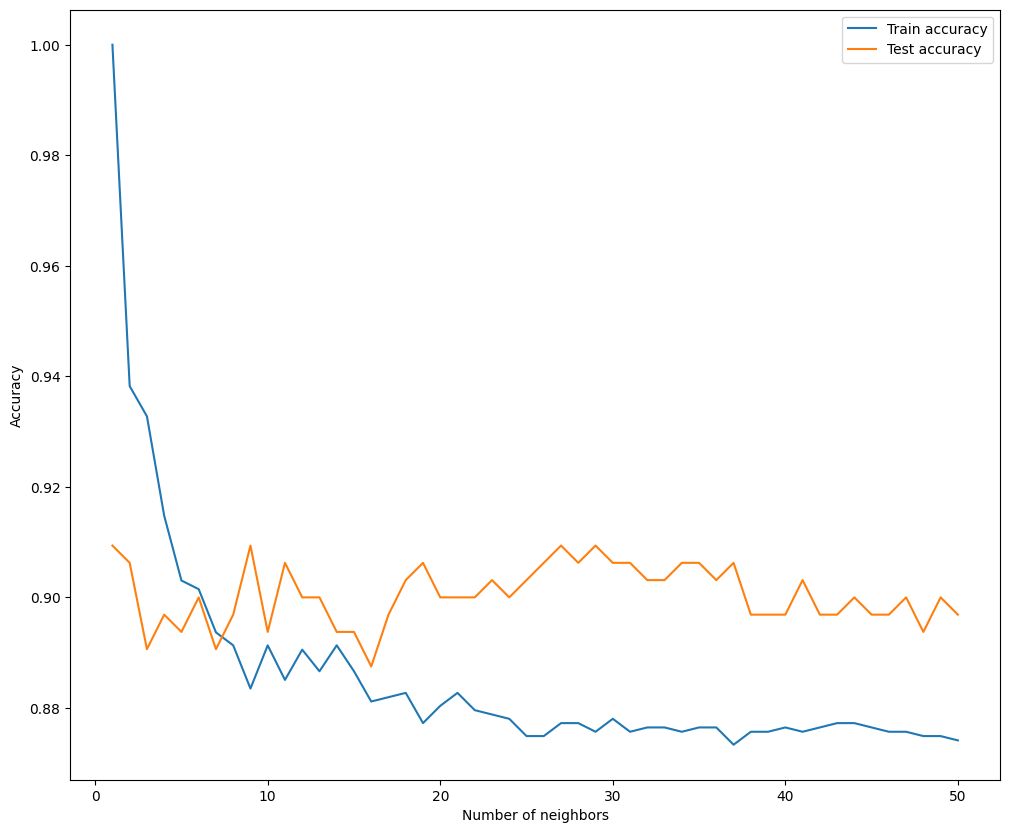

In [269]:
plt.figure(figsize=(12, 10))
plt.plot(neighbors, list(train_accuracy.values()), label='Train accuracy')
plt.plot(neighbors, list(test_accuracy.values()), label='Test accuracy')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [270]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.909375

Classification Report:
                precision    recall  f1-score   support

           0       0.93      0.97      0.95       277
           1       0.73      0.51      0.60        43

    accuracy                           0.91       320
   macro avg       0.83      0.74      0.78       320
weighted avg       0.90      0.91      0.90       320

Score:  0.909375


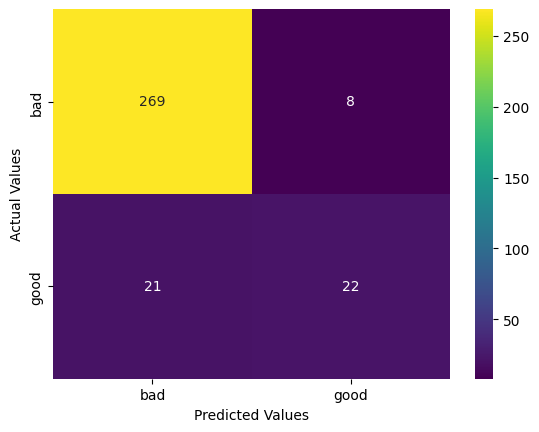

In [271]:
print("Classification Report:\n ", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d",cmap='viridis', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

sc = accuracy_score(y_test, y_pred)
print("Score: ", sc)
model_names.append("KNN")
model_scores.append(sc)


Best Parameters: {'n_neighbors': np.int64(2)}
Best Cross-Validation Score: 0.8788082107843138
[[271   6]
 [ 24  19]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       277
           1       0.76      0.44      0.56        43

    accuracy                           0.91       320
   macro avg       0.84      0.71      0.75       320
weighted avg       0.90      0.91      0.90       320



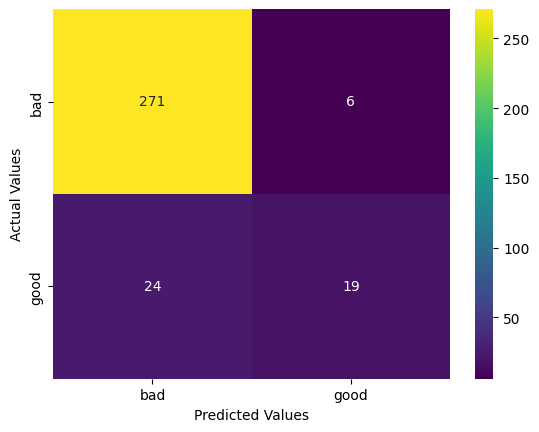

In [272]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': np.arange(1, 51)}

# Initialize the GridSearchCV with KNN classifier
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score}')

# Train the best model on the full training set
best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)

# Predict on the test set
y_pred_best = best_knn.predict(X_test)

# Evaluate the best model
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print(conf_matrix_best)

class_report_best = classification_report(y_test, y_pred_best, zero_division=0)
print(class_report_best)

sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='viridis', xticklabels=['bad', 'good'], yticklabels=['bad', 'good'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


### Hence the KNN value must be taken somewhere between 35 

# Random Forest Classifier

It's like multiple number of decision tree. the lower numbers of decision tree the more accurate the model will be.

In [273]:
from sklearn.ensemble import RandomForestClassifier

In [274]:
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)


In [275]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Model Evaluation

Accuracy Score


In [276]:
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.9375

Classification Report:
                precision    recall  f1-score   support

           0       0.94      0.99      0.96       277
           1       0.93      0.58      0.71        43

    accuracy                           0.94       320
   macro avg       0.93      0.79      0.84       320
weighted avg       0.94      0.94      0.93       320

RandomForest:  0.9375


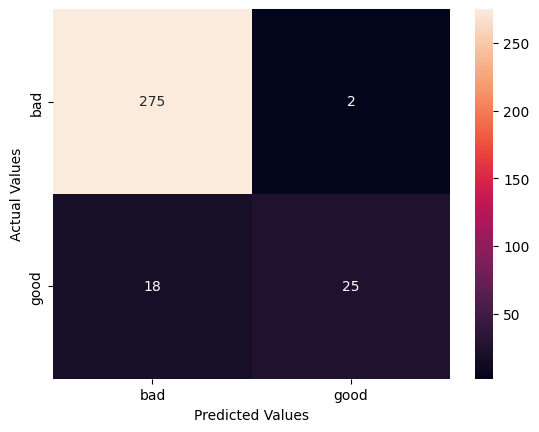

In [277]:
print("Classification Report:\n ", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

sc = accuracy_score(y_test, y_pred)
print("RandomForest: ", sc)
model_names.append("RandomForest")
model_scores.append(sc)


# Logistic Regression

In [278]:
from sklearn.linear_model import LogisticRegression

In [279]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy_score(y_test, y_pred)

0.89375

Classification Report:
                precision    recall  f1-score   support

           0       0.91      0.97      0.94       277
           1       0.70      0.37      0.48        43

    accuracy                           0.89       320
   macro avg       0.80      0.67      0.71       320
weighted avg       0.88      0.89      0.88       320

RandomForest:  0.89375


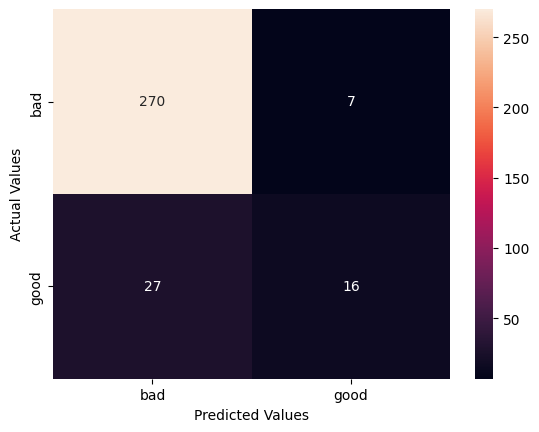

In [280]:
print("Classification Report:\n ", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

sc = accuracy_score(y_test, y_pred)
print("RandomForest: ", sc)
model_scores.append("Logistic Regression")
model_scores.append(sc)
